# **Machine Learning from Data**

## Lab 2: Feature selection using PCA


2021 - Veronica Vilaplana - [GPI @ IDEAI](https://imatge.upc.edu/web/) Research group

-----------------

#Part1: PCA and Dimensionality reduction

Based on
* “Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition,
by Aurélien Géron (O’Reilly). Copyright 2019 Aurélien Géron, 978-1-492-
03264-9.”
* "Python Data Science Handbook by Jake VanderPlas (O'Reilly)."

Many machine learning problems involve  thousands of features for each training instance. These features make training extremely slow, and cand also make it harder to find a good solution. This problem is often referred as *the curse of dimensionality*.

In many real-world problems it is often possible to reduce the number of features considerably, turning an intractable problem into a tractable one.

In addition to speeding up training, dimensionality reduction is useful for data visualization: reducing the number of dimensions to two or three makes it possible to plot a condensed view of a high dimensional set and visually detecting patterns or clusters.

In this exercise we will analyze one approach for dimensionality reduction: projection. It is based on the observation that in many problems, instances are not spread out uniformly across all dimensions. Features may be constant or correlated, and as a result, samples lies within or close to a much lower dimensional subspace of the original high dimensional space.

Principal Component Analysis is one of the most popular dimensionality reduction techniques, which identifies the hyperplane that lies closest to the data and then projects the data on it.

There are other problems where the subspace where samples lie may twist and turn. In that case, projection methods may not be adequate, and other methods are used, methods that work by modeling the manifold where the samples lie (manifold learning approaches). This kind of problems and solutions are outside the scope of this lab.

We start importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Introducing Principal Component Analysis

Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data.

Consider the following 200 random points:

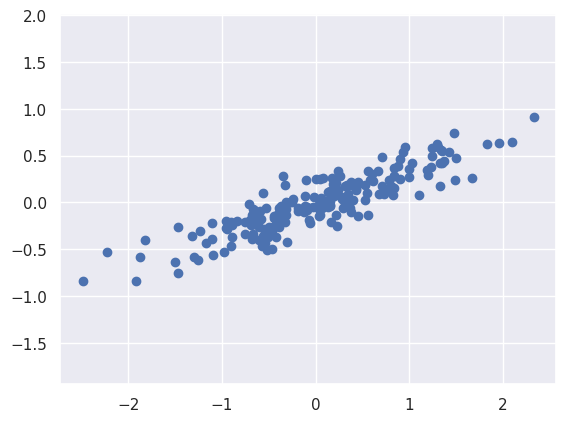

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

There is a near linear relationship between the x and y variables. We want to learn about this relationship. In Principal Component Analysis this relationship is quantified by finding the *principal axes* in the data, and using these axes to describe the dataset.

We use scikit-learn `PCA` estimator to compute it:

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

This fit learns from the data the "components" and the "explained variance"

`components_` is a ndarray of shape (n_components, n_features), it contains the principal axes in the feature space, representing the directions of maximum variance in the data. The components are sorted by `explained_variance_`.

`explained_variance_` is the amount of variance explained by each of the selected components. The variance estimation uses n_samples - 1 degrees of freedom.

`explained_variance_ratio_` provides the percentage of variance explained by each of the selected components.

In [5]:
print(pca.components_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]


In [6]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


In [7]:
print(pca.explained_variance_ratio_)

[0.97634101 0.02365899]


The first dimension explains about 98% of the variance, while the second explains about 2%.

We will visualize this as vectors over the input data. The "components" will define the direction of the vectors, and the "explained variance" will define the squared length of the vector:

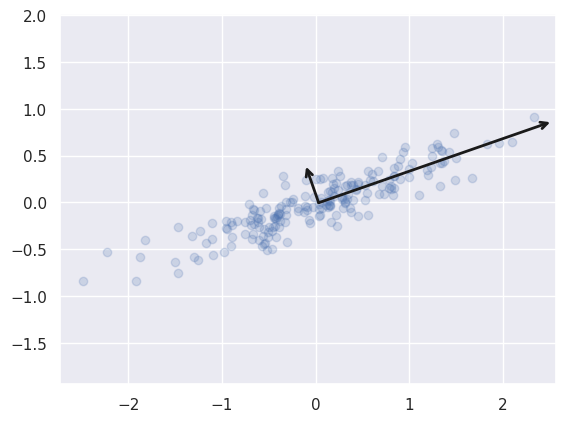

In [8]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='k')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

The vectors represent the *principal axes* of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data. It is a measure of the variance of the data when projected onto that axis.
The projection of each data point onto the principal axes are the "principal components" of the data.


### PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Following the previous example, we project the data to the first principal component.

In [10]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

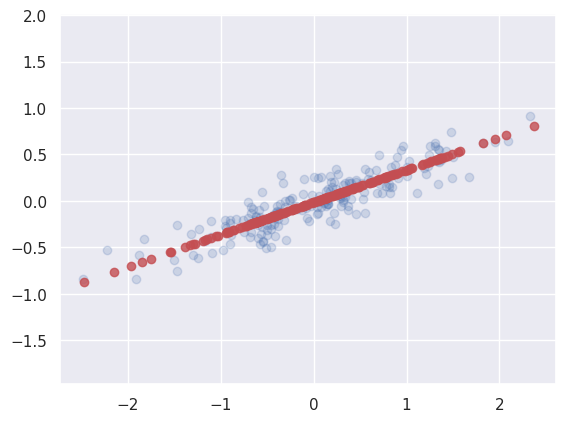

In [11]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color='r')
plt.axis('equal');

The light blue points are the original data, while the red points are the projected version. The information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

### PCA for visualization: Hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.

We start by loading the data:

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

The data consists of 8×8 pixel images, meaning that they are 64-dimensional. Let's visualize the first few data samples

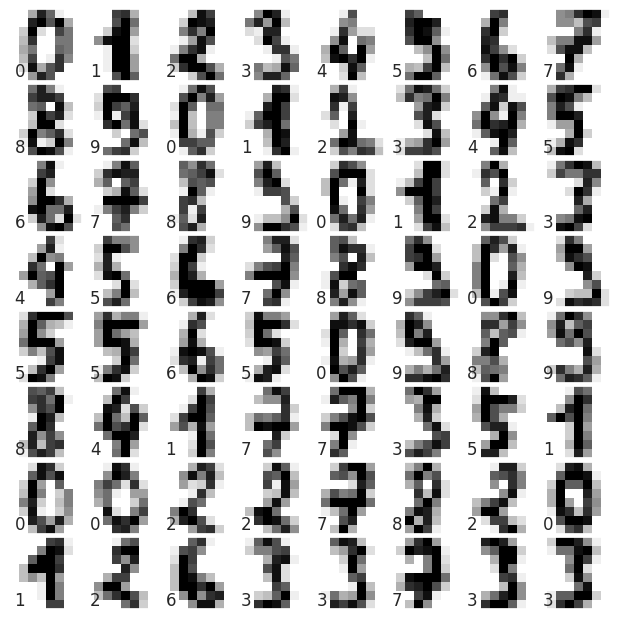

In [14]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [15]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal components of each point to learn about the data. The plot shows the projection of each data point along the directions with the largest variance. We will use different colors to represent the digits, so we can see if the projected samples corresponding to the same class (digit) are cluster in the plane.


<ipython-input-16-1274591342e2>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('jet', 10))


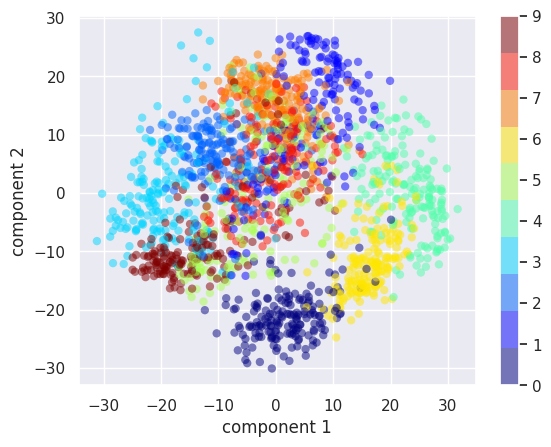

In [16]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('jet', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### What do the components mean?

PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset.
The principal components, which act as the low-dimensional representation of the data, are simply the coefficients that multiply each of the elements in this series.

We will illustrate this meaning in a following lab.

### Choosing the number of components

An important part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components.

For the digits dataset:

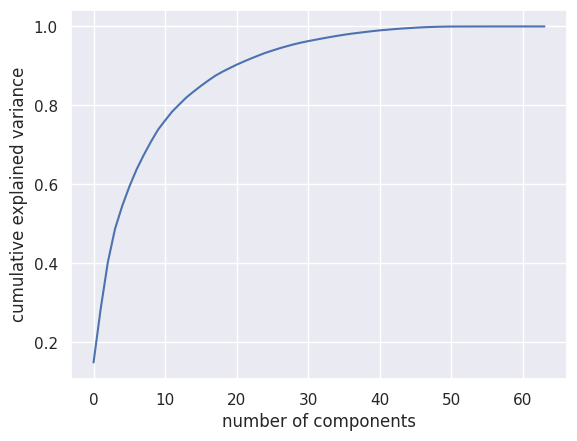

In [17]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components.
For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

### t-SNE

Finally, we will use tSNE to reduce the digit dataset down to two dimensions and plot the result. We will use different colors to represent the digits, so we can see if the projected samples corresponding to the same class (digit) are cluster in the plane.

In [18]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=1)
X_reduced = tsne.fit_transform(digits.data)

<ipython-input-20-a914b6abf446>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('jet', 10))


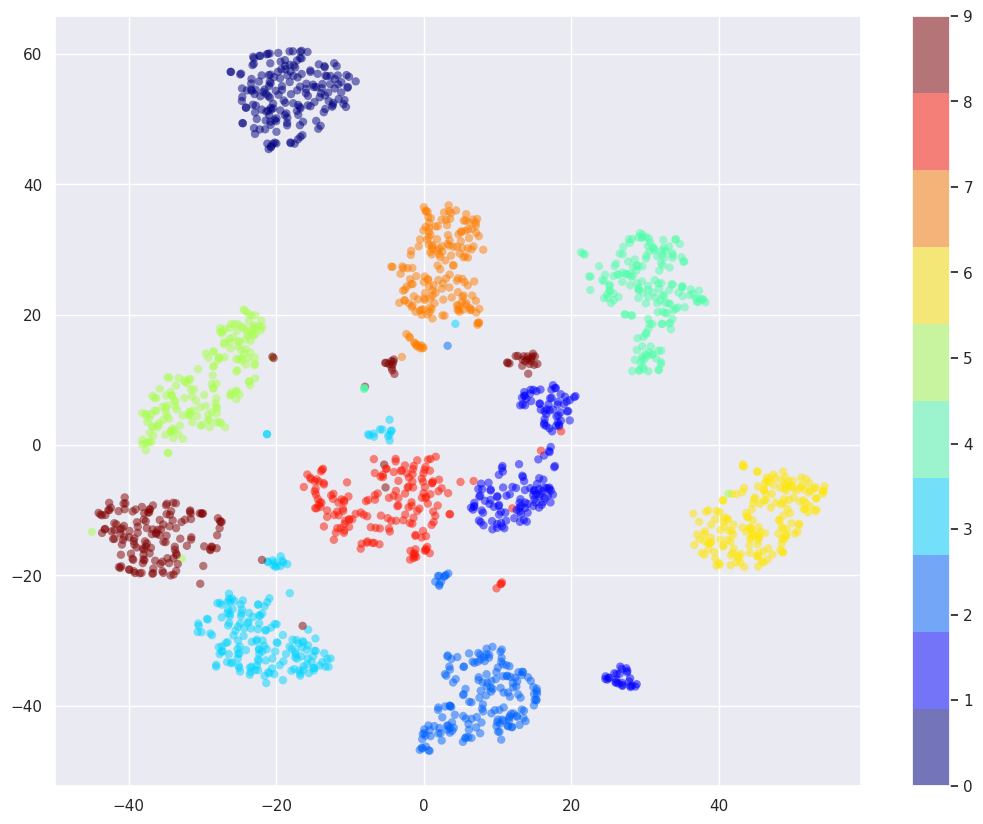

In [20]:
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('jet', 10))
#plt.axis('off')
plt.colorbar();
plt.show()